# 1. text-CNN

# 2. Bi-LSTM

# 3. LSTM

# 4. BERT

# 5. RoBERTa



In [ ]:
%pip install tf-keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install pandas numpy scikit-learn nltk tensorflow torch transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U transformers accelerate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 --force-reinstall

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torch-2.5.1%2Bcu121-cp311-cp311-win_amd64.whl (2449.4 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.20.1%2Bcu121-cp311-cp311-win_amd64.whl (6.1 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.5.1%2Bcu121-cp311-cp311-win_amd64.whl (4.1 MB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached https://download.pytorch.org/whl/typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached networkx-3.6.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached https://download.pytorch.org/whl/jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.12.0-py3-none-any.whl.metadata (10 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.3.5 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.3.5 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.3.5 which is incompatible.
numba 0.59.0 requires nu

In [ ]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [ ]:
import accelerate
print(accelerate.__version__)

1.12.0


In [ ]:
import transformers
print(transformers.__version__)

4.57.3


In [ ]:
import torch
print(f"Is CUDA available? {torch.cuda.is_available()}")
print(f"GPU Name: {torch.cuda.get_device_name(0)}")

Is CUDA available? True
GPU Name: NVIDIA GeForce RTX 4070 Ti SUPER


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, Conv1D, GlobalMaxPooling1D, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam


import torch
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel



from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score
from transformers import RobertaTokenizer, RobertaForSequenceClassification

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\T2520843\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\T2520843\AppData\Roaming\Python\Python311\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [ ]:
df = pd.read_csv("hateXplain.csv")


In [ ]:
df.shape

(60444, 5)

Making all label same casing

In [ ]:
df["label"] = df["label"].str.lower()

In [ ]:
df.isnull().sum()

post_id             0
annotator_id        0
label               0
target          21192
post_tokens         0
dtype: int64

Replacing all null values with "other" word as they are imortant

In [ ]:
df["target"] = df["target"].fillna("Other")

In [ ]:
df.isnull().sum()

post_id         0
annotator_id    0
label           0
target          0
post_tokens     0
dtype: int64

Majority voting

Extracting unique texts based on post id and assigning with most common label

For target column, if all values are none, simply returns Nnone without counting.

In [ ]:
final_df = (
    df.groupby("post_id")
      .agg({
          "post_tokens": "first",
          "label": lambda x: x.value_counts().idxmax(),
          "target": lambda x: x.value_counts().idxmax() if not x.value_counts().empty else None
      })
      .reset_index(drop=True)
)

In [ ]:
final_df.shape

(20148, 3)

In [ ]:
final_df.head(15)

,post_tokens,label,target
0,jews are responsible for destroying my towns c...,hatespeech,Jewish
1,leftist mind control fails i think this overst...,normal,"Men, Other"
2,the scientific findings that advocates and the...,offensive,Homosexual
3,it why they behave like animals no matter wher...,hatespeech,African
4,why are people so offended by the word paki su...,offensive,Arab
5,sugar grove that out <number> sugar grove is n...,offensive,Caucasian
6,actually it the resist the dick movement it do...,offensive,Homosexual
7,right definitely not going back to the fag hag...,hatespeech,Homosexual
8,às vezes eu esqueço que meu nome tem origem sa...,offensive,Arab
9,oh look another peace gesture by the arab and ...,normal,Islam


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20148 entries, 0 to 20147
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   post_tokens  20148 non-null  object
 1   label        20148 non-null  object
 2   target       20148 non-null  object
dtypes: object(3)
memory usage: 472.3+ KB


Checked missing value

In [ ]:
final_df.isnull().sum()

post_tokens    0
label          0
target         0
dtype: int64

In [ ]:
final_df.shape

(20148, 3)

Label encoding

In [ ]:
label_map = {
    "normal": 0,
    "offensive": 1,
    "hatespeech": 2
}

final_df = final_df[final_df["label"].isin(label_map.keys())]
final_df["label"] = final_df["label"].map(label_map)


In [ ]:
final_df.head()

,post_tokens,label,target
0,jews are responsible for destroying my towns c...,2,Jewish
1,leftist mind control fails i think this overst...,0,"Men, Other"
2,the scientific findings that advocates and the...,1,Homosexual
3,it why they behave like animals no matter wher...,2,African
4,why are people so offended by the word paki su...,1,Arab


Removed unwanted signs from texts if there is any

In [ ]:
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    filtered_words = []
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    cleaned_text = " ".join(filtered_words)
    return text

In [ ]:
final_df["post_tokens"] = final_df["post_tokens"].apply(clean_text)


In [ ]:
final_df

,post_tokens,label,target
0,jews are responsible for destroying my towns c...,2,Jewish
1,leftist mind control fails i think this overst...,0,"Men, Other"
2,the scientific findings that advocates and the...,1,Homosexual
3,it why they behave like animals no matter wher...,2,African
4,why are people so offended by the word paki su...,1,Arab
...,...,...,...
20143,was macht der moslem wenn der zion gegen seine...,0,Other
20144,it is awful look at world demographics asians ...,2,Asian
20145,bill clinton is an evil creature um maybe slic...,1,Islam
20146,the uk has threatened to return radioactive wa...,1,"Minority, Refugee, Indian"


Checking missbalance

In [ ]:
class_counts = final_df.groupby("label").size()

In [ ]:
labels = final_df['label'].unique().tolist()

count = []
percentage = []

total_samples = len(final_df)

for val in labels:
    count.append(class_counts[val])
    percent = (class_counts[val] / total_samples) * 100
    percentage.append(percent)


In [ ]:
output_column = ['label', 'count', 'percentage']

imbalanced_dataset = pd.DataFrame(list(zip(labels, count, percentage)), columns=output_column)

print(imbalanced_dataset)


   label  count  percentage
0      2   6234   30.941036
1      0   8153   40.465555
2      1   5761   28.593409


Oversample minority class

In [ ]:
from sklearn.utils import resample

df_normal = final_df[final_df['label'] == 0]#8153
df_offensive = final_df[final_df['label'] == 1]#5761 < 8153
df_hatespeech = final_df[final_df['label'] == 2]#6234 < 8153

max_size = len(df_normal)

df_offensive_upsampled = resample(df_offensive,
                                  replace=True,
                                  n_samples=max_size,
                                  random_state=42)

df_hatespeech_upsampled = resample(df_hatespeech,
                                   replace=True,
                                   n_samples=max_size,
                                   random_state=42)

df_balanced = pd.concat([df_normal, df_offensive_upsampled, df_hatespeech_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)



Checking whether datset is balanced or not

In [ ]:
print(df_balanced['label'].value_counts())
class_counts = df_balanced.groupby('label').size()
print(class_counts)

total = len(df_balanced)
percentages = (class_counts / total) * 100
print(percentages)


label
0    8153
2    8153
1    8153
Name: count, dtype: int64
label
0    8153
1    8153
2    8153
dtype: int64
label
0    33.333333
1    33.333333
2    33.333333
dtype: float64


In [ ]:

df_balanced.shape

(24459, 3)

In [ ]:
df_balanced.head(10)

,post_tokens,label,target
5622,user user user no not wrong the number defense...,0,Other
18897,sean spicier user twitter the president appre...,2,Refugee
10244,i just watched the ghettoest snapchat in my en...,1,African
10850,keep telling us how bored we are hymie,1,Jewish
16072,trump is not a kike he a shabbos goy who works...,2,Jewish
19736,nope the poorest white areas have less violent...,2,African
4511,charlton heston i fucking hate you for keeping...,0,Other
14557,this yid parasitic bitch should be hanged on t...,2,Jewish
4525,user her phases have now included scene jack s...,0,Other
5149,nigga jay z said i am what supreme did not bec...,0,Other


Train-Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced["post_tokens"],
    df_balanced["label"],
    test_size=0.2,
    random_state=42,
    stratify=df_balanced["label"]
)


# **Tokenization**

In [ ]:
MAX_VOCAB_SIZE = 20000
MAX_SEQUENCE_LENGTH = 120#tried 100

In [ ]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')


# **textCNN model**

In [ ]:
from tensorflow.keras.regularizers import l2

cnn_model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQUENCE_LENGTH),
    Conv1D(filters=32, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01)),#tried 0.005 and filter 32
    GlobalMaxPooling1D(),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),#layer 16
    Dropout(0.7),#tried 0.5, 0.6
    Dense(3, activation='softmax')
])

cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),#tried 0.01, 0.0005, 0.003, 0.0003
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#tred without early stoppig
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#tried monitoring val_accuracy and patience -> 3, 5

history = cnn_model.fit(
    X_train_pad,
    y_train,
    validation_data=(X_test_pad, y_test),
    epochs=20,#tried 10, 5, 15
    batch_size=64,
    callbacks=[early_stop]
)

Epoch 1/20


C:\Users\T2520843\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4295 - loss: 1.1863 - val_accuracy: 0.6202 - val_loss: 0.9566
Epoch 2/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5435 - loss: 0.9462 - val_accuracy: 0.6582 - val_loss: 0.8728
Epoch 3/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5898 - loss: 0.8666 - val_accuracy: 0.6807 - val_loss: 0.8258
Epoch 4/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6150 - loss: 0.8044 - val_accuracy: 0.6987 - val_loss: 0.7990
Epoch 5/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6362 - loss: 0.7555 - val_accuracy: 0.7108 - val_loss: 0.7895
Epoch 6/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6591 - loss: 0.7172 - val_accuracy: 0.7122 - val_loss: 0.7792
Epoch 7/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6884 - loss: 0.6888 - val_accuracy: 0.7087 - val_loss: 0.7994
Epoch 8/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7166 - loss: 0.6594 - val_accuracy: 0.7298 - val_

Evaluate text-CNN

Test Loss: 77.1767
Test Accuracy: 75.9607


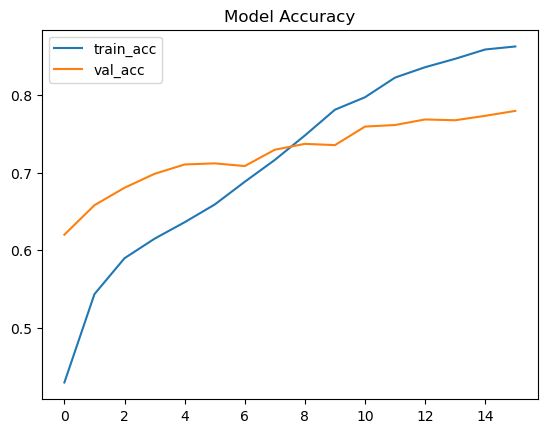

In [ ]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_pad, y_test, verbose=0)

print(f"Test Loss: {cnn_loss* 100 :.4f}")
print(f"Test Accuracy: {cnn_accuracy* 100:.4f}")


import matplotlib.pyplot as plt

plt.plot(cnn_model.history.history['accuracy'], label='train_acc')
plt.plot(cnn_model.history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# **LSTM Model**

In [ ]:
EMBEDDING_DIM = 128

lstm_model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE,output_dim=128,input_length=MAX_SEQUENCE_LENGTH),
    LSTM(units=128,return_sequences=False),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(3, activation="softmax")
])

lstm_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(learning_rate=0.005),#used 0.001
    metrics=["accuracy"]
)

history = lstm_model.fit(
    X_train_pad,
    y_train,
    validation_data=(X_test_pad, y_test),
    epochs=15,
    batch_size=64
)


Epoch 1/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.3314 - loss: 1.1017 - val_accuracy: 0.3332 - val_loss: 1.0992
Epoch 2/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 62s 162ms/step - accuracy: 0.3297 - loss: 1.0990 - val_accuracy: 0.3332 - val_loss: 1.0988
Epoch 3/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 57s 80ms/step - accuracy: 0.3285 - loss: 1.0990 - val_accuracy: 0.3332 - val_loss: 1.0988
Epoch 4/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.3308 - loss: 1.0994 - val_accuracy: 0.3332 - val_loss: 1.0988
Epoch 5/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3318 - loss: 1.0990 - val_accuracy: 0.3332 - val_loss: 1.0996
Epoch 6/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.3323 - loss: 1.0990 - val_accuracy: 0.3332 - val_loss: 1.0989
Epoch 7/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3326 - loss: 1.0989 - val_accuracy: 0.3332 - val_loss: 1.0988
Epoch 8/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.3322 - loss: 1.0989 -

Evaluate LSTM Model

Test Loss: 109.8668
Test Accuracy: 33.3197


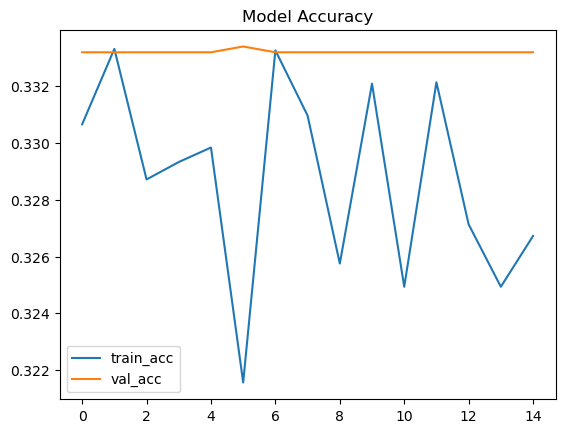

In [ ]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_pad, y_test, verbose=0)

print(f"Test Loss: {lstm_loss* 100 :.4f}")
print(f"Test Accuracy: {lstm_accuracy* 100:.4f}")


plt.plot(lstm_model.history.history['accuracy'], label='train_acc')
plt.plot(lstm_model.history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# **Bidirectional LSTM Model**

In [ ]:
Bi_lstm_model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=100),  # tried removing input_length
    SpatialDropout1D(0.3),
    Bidirectional(
        LSTM(48, dropout=0.3, recurrent_dropout=0.2, return_sequences=False)
    ),
    Dense(32, activation='relu', kernel_regularizer=l2(0.005)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

Bi_lstm_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = Bi_lstm_model.fit(
    X_train_pad,
    y_train,
    validation_data=(X_test_pad, y_test),
    epochs=15,
    batch_size=64
)

Epoch 1/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.4675 - loss: 1.1306 - val_accuracy: 0.6083 - val_loss: 0.9052
Epoch 2/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 38s 124ms/step - accuracy: 0.6326 - loss: 0.8549 - val_accuracy: 0.6686 - val_loss: 0.7914
Epoch 3/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 40s 130ms/step - accuracy: 0.7089 - loss: 0.7311 - val_accuracy: 0.7044 - val_loss: 0.7562
Epoch 4/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.7671 - loss: 0.6286 - val_accuracy: 0.7152 - val_loss: 0.7424
Epoch 5/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 29s 95ms/step - accuracy: 0.8089 - loss: 0.5456 - val_accuracy: 0.7449 - val_loss: 0.7146
Epoch 6/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 32s 105ms/step - accuracy: 0.8409 - loss: 0.4796 - val_accuracy: 0.7502 - val_loss: 0.7118
Epoch 7/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - accuracy: 0.8652 - loss: 0.4239 - val_accuracy: 0.7584 - val_loss: 0.6939
Epoch 8/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.8805 - loss: 0.3

Test Loss: 83.4534
Test Accuracy: 77.6165


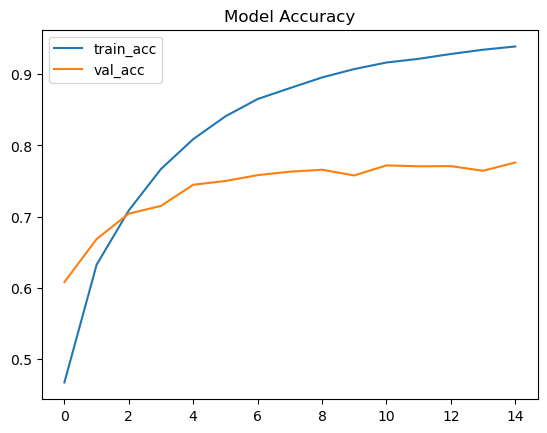

In [ ]:
Bi_lstm_loss, Bi_lstm_accuracy = Bi_lstm_model.evaluate(X_test_pad, y_test, verbose=0)

print(f"Test Loss: {Bi_lstm_loss* 100 :.4f}")
print(f"Test Accuracy: {Bi_lstm_accuracy* 100:.4f}")


plt.plot(Bi_lstm_model.history.history['accuracy'], label='train_acc')
plt.plot(Bi_lstm_model.history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()

Evaluate all models - textCNN, LSTM, Bi-LSTM

In [ ]:
print(f"--- Model Accuracy Comparison ---")
print(f"CNN Test Accuracy:  {cnn_accuracy:.4f}")
print(f"LSTM Test Accuracy: {lstm_accuracy:.4f}")
print(f"Bi_LSTM Test Accuracy: {Bi_lstm_accuracy:.4f}")

--- Model Accuracy Comparison ---
CNN Test Accuracy:  0.7596
LSTM Test Accuracy: 0.3332
Bi_LSTM Test Accuracy: 0.7762


# BERT Model

In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score

In [ ]:
# 1. Define the Dataset Class
# This converts our cleaned text and labels into the format BERT understands
class HateDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # Extract features for the current index and convert to tensors
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # BERT expects the label key to be exactly 'labels'
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
# 2. Tokenization
# We use the 'uncased' model because your preprocessing already converted text to lowercase
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer_bert(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer_bert(list(X_test), truncation=True, padding=True, max_length=128)

# Create the Dataset objects
train_dataset = HateDataset(train_encodings, y_train.tolist())
test_dataset = HateDataset(test_encodings, y_test.tolist())

In [ ]:
# 3. Model Definition
# We initialize the weights for 3 classes: Normal, Offensive, Hatespeech
model_bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args_bert = TrainingArguments(
    output_dir='./results_bert',
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none"
)

In [ ]:

# Metric function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc}

# 5. Trainer
trainer_bert = Trainer(
    model=model_bert,
    args=training_args_bert,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# 6. Train and Evaluate
trainer_bert.train()
bert_eval_results = trainer_bert.evaluate()
bert_train_results = trainer_bert.evaluate(train_dataset)
bert_loss_results = trainer_bert.evaluate()

print(f"BERT Train Accuracy: {bert_train_results['eval_accuracy']:.4f}")
print(f"BERT Test Accuracy: {bert_eval_results['eval_accuracy']:.4f}")
print(f"BERT Loss Accuracy: {bert_loss_results['eval_accuracy']:.4f}")

Epoch,Training Loss,Validation Loss,Accuracy
1,0.892400,0.725546,0.692559
2,0.632300,0.568657,0.789043
3,0.397400,0.588049,0.810303


BERT Train Accuracy: 0.9095
BERT Test Accuracy: 0.7890
BERT Loss Accuracy: 0.7890


# Robert Model

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

In [ ]:
# 1. Tokenization
tokenizer_rob = RobertaTokenizer.from_pretrained('roberta-base')

train_enc_rob = tokenizer_rob(list(X_train), truncation=True, padding=True, max_length=128)
test_enc_rob = tokenizer_rob(list(X_test), truncation=True, padding=True, max_length=128)

train_dataset_rob = HateDataset(train_enc_rob, y_train.tolist())
test_dataset_rob = HateDataset(test_enc_rob, y_test.tolist())

In [ ]:
# 2. Model Definition
model_rob = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# 3. Training Arguments
training_args_rob = TrainingArguments(
    output_dir='./results_roberta',
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    report_to="none"
)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

# 4. Trainer
trainer_rob = Trainer(
    model=model_rob,
    args=training_args_rob,
    train_dataset=train_dataset_rob,
    eval_dataset=test_dataset_rob,
    compute_metrics=compute_metrics
)

# 5. Train and Evaluate
trainer_rob.train()
rob_eval_results = trainer_rob.evaluate()
rob_train_results = trainer_rob.evaluate(train_dataset_rob)
rob_loss_results = trainer_rob.evaluate()

print(f"RoBERTa Train Accuracy: {rob_train_results['eval_accuracy']:.4f}")
print(f"RoBERTa Test Accuracy: {rob_eval_results['eval_accuracy']:.4f}")
print(f"RoBERTa Loss Accuracy: {rob_loss_results['eval_accuracy']:.4f}")

Epoch,Training Loss,Validation Loss,Accuracy
1,0.839200,0.719348,0.700531
2,0.653800,0.656651,0.742437
3,0.507200,0.628852,0.773917


RoBERTa Train Accuracy: 0.9070
RoBERTa Test Accuracy: 0.7739
RoBERTa Loss Accuracy: 0.7739


# **Evaluation funtion of all model**

In [ ]:
#label_map = {"normal": 0,"offensive": 1,"hatespeech": 2}

target_names = list(label_map.keys())

In [ ]:
from sklearn.metrics import classification_report, accuracy_score


def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n{model_name} Accuracy: {accuracy:.4f}\n")
    print(classification_report(
        y_test,
        y_pred,
        target_names = target_names,
        digits=4
    ))

In [ ]:
bert_y_predictions = trainer_bert.predict(test_dataset)
bert_y_pred = np.argmax(bert_y_predictions.predictions, axis=1)
bert_y_true = bert_y_predictions.label_ids

In [ ]:
rob_y_predictions = trainer_rob.predict(test_dataset_rob)
rob_y_pred = np.argmax(rob_y_predictions.predictions, axis=1)
rob_y_true = rob_y_predictions.label_ids

In [ ]:
print("---------------------------------------------")
print("\ntext-CNN Classification Report:\n")
evaluate_model(cnn_model, X_test_pad, y_test, model_name="TextCNN")
print("---------------------------------------------")
print("\nLSTM Classification Report:\n")
evaluate_model(lstm_model, X_test_pad, y_test, model_name="LSTM")
print("---------------------------------------------")
print("\nBi-LSTM Classification Report:\n")
evaluate_model(Bi_lstm_model, X_test_pad, y_test, model_name="Bi-LSTM")
print("---------------------------------------------")
print("\nBERT Classification Report:\n")
print(classification_report(bert_y_true,bert_y_pred,target_names=target_names,digits=4))
print("---------------------------------------------")
print("\nRoBERTa Classification Report:\n")
print(classification_report(rob_y_true,rob_y_pred,target_names=target_names,digits=4))

---------------------------------------------

text-CNN Classification Report:

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

TextCNN Accuracy: 0.7596

              precision    recall  f1-score   support

      normal     0.7208    0.6969    0.7087      1630
   offensive     0.7052    0.7333    0.7190      1631
  hatespeech     0.8543    0.8486    0.8514      1631

    accuracy                         0.7596      4892
   macro avg     0.7601    0.7596    0.7597      4892
weighted avg     0.7601    0.7596    0.7597      4892

---------------------------------------------

LSTM Classification Report:

153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step

LSTM Accuracy: 0.3332

              precision    recall  f1-score   support

      normal     0.3332    1.0000    0.4998      1630
   offensive     0.0000    0.0000    0.0000      1631
  hatespeech     0.0000    0.0000    0.0000      1631

    accuracy                         0.3332      4892
   macro avg     0.1111    0.3333    0.1666      4892
wei

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step

Bi-LSTM Accuracy: 0.7762

              precision    recall  f1-score   support

      normal     0.7605    0.7245    0.7421      1630
   offensive     0.7517    0.7462    0.7489      1631
  hatespeech     0.8134    0.8578    0.8350      1631

    accuracy                         0.7762      4892
   macro avg     0.7752    0.7762    0.7753      4892
weighted avg     0.7752    0.7762    0.7753      4892

---------------------------------------------

BERT Classification Report:

              precision    recall  f1-score   support

      normal     0.7888    0.7607    0.7745      1630
   offensive     0.7727    0.7002    0.7346      1631
  hatespeech     0.8024    0.9062    0.8511      1631

    accuracy                         0.7890      4892
   macro avg     0.7880    0.7890    0.7868      4892
weighted avg     0.7880    0.7890    0.7868      4892

---------------------------------------------

RoBERTa Classification Report:

              

In [ ]:
# Extract BERT validation accuracy - get only end-of-epoch evaluations
bert_history = trainer_bert.state.log_history
# Filter for entries with eval_accuracy and take only those with eval_loss (end of epoch marker)
bert_evals = [(i, log['eval_accuracy']) for i, log in enumerate(bert_history) if 'eval_accuracy' in log and 'eval_loss' in log]
bert_val_acc = [acc for _, acc in bert_evals[:3]]  # Take only first 3 (for 3 epochs)


In [ ]:
# Extract RoBERTa validation accuracy - get only end-of-epoch evaluations
roberta_history = trainer_rob.state.log_history
roberta_evals = [(i, log['eval_accuracy']) for i, log in enumerate(roberta_history) if 'eval_accuracy' in log and 'eval_loss' in log]
roberta_val_acc = [acc for _, acc in roberta_evals[:3]]  # Take only first 3 (for 3 epochs)

In [ ]:
# Get final validation accuracies
cnn_final = cnn_model.history.history['val_accuracy'][-1]
lstm_final = lstm_model.history.history['val_accuracy'][-1]
bilstm_final = Bi_lstm_model.history.history['val_accuracy'][-1]
bert_final = bert_val_acc[-1]
roberta_final = roberta_val_acc[-1]

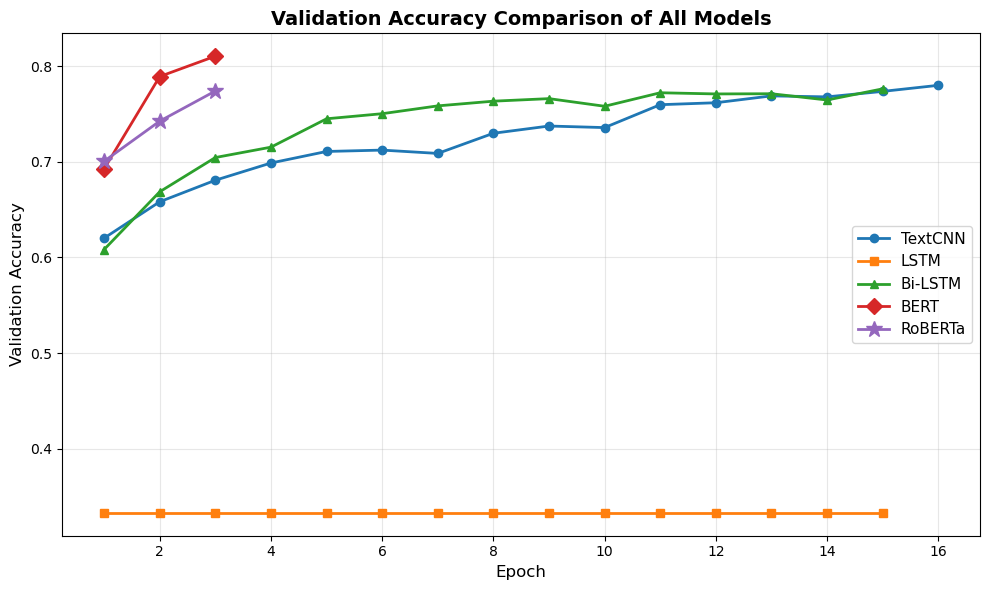

In [ ]:
# Plot all 5 models' validation accuracy in one graph with correct epoch alignment
plt.figure(figsize=(10, 6))

# Plot each model with its actual epoch range
plt.plot(range(1, len(cnn_model.history.history['val_accuracy'])+1),
         cnn_model.history.history['val_accuracy'],
         label='TextCNN', marker='o', linewidth=2)

plt.plot(range(1, len(lstm_model.history.history['val_accuracy'])+1),
         lstm_model.history.history['val_accuracy'],
         label='LSTM', marker='s', linewidth=2)

plt.plot(range(1, len(Bi_lstm_model.history.history['val_accuracy'])+1),
         Bi_lstm_model.history.history['val_accuracy'],
         label='Bi-LSTM', marker='^', linewidth=2)

plt.plot(range(1, len(bert_val_acc)+1),
         bert_val_acc,
         label='BERT', marker='D', linewidth=2, markersize=8)

plt.plot(range(1, len(roberta_val_acc)+1),
         roberta_val_acc,
         label='RoBERTa', marker='*', markersize=12, linewidth=2)

plt.title('Validation Accuracy Comparison of All Models', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()